# Price Foreteller for Pre-ownedCars

## Importing libraries

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## Read Data from .xlsx

In [424]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [425]:
train.shape, test.shape

((6019, 12), (1234, 12))

## Remove duplicate entries

In [426]:
test.drop_duplicates(subset=None, keep='first', inplace=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [427]:
train.duplicated().sum(), test.duplicated().sum()

(0, 1)

In [428]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## Data Exploration
### To get basic idea of data types present in the dataset

In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


### Finding number of null values in each column

In [430]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### Finding number of unique entries in each column

In [431]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

### Removing outliers

In [432]:
#stores all cars driven in range 999 - 700000 kms

train = train[train['Kilometers_Driven'] < 700000]
train = train[train['Kilometers_Driven'] > 999]

In [433]:
#stores data of all cars running on fuel other than electricity

train = train[train['Fuel_Type'] != 'Electric']

#Finding total number of cars following above category

len(train)

6012

### Append train and test data for further manipulation

In [434]:
df = train.append(test, ignore_index=True, sort=False)
df1 = test

In [435]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,NaN
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,NaN


In [436]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


### Add new column Car_Age

In [437]:
df['Car_Age'] = 2020 - df['Year']
df1['Car_Age'] = 2020 - df1['Year']

In [438]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,NaN,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,NaN,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,NaN,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,NaN,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,NaN,7


In [439]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Age
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,6
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,7
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,3
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,8
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,6


### Extract float or integers from strings

In [440]:
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
df1['Engine'] = df1['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [441]:
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
df1['Power'] = df1['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [442]:
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
df1['Mileage'] = df1['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [443]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,NaN,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,NaN,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,NaN,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,8
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,NaN,7


In [444]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Age
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,6
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN,7
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh,3
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,0.00,5.0,NaN,8
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,6


## Data Visualisation
### 1.Location

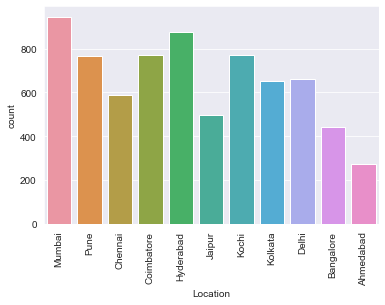

In [445]:
plt.xticks(rotation = 90)
sns.countplot(df['Location'])

### 2. Year of Purchase

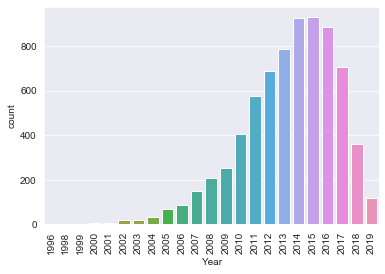

In [446]:
plt.xticks(rotation = 90)
sns.countplot(df['Year'])

### 3. Kilometers Driven

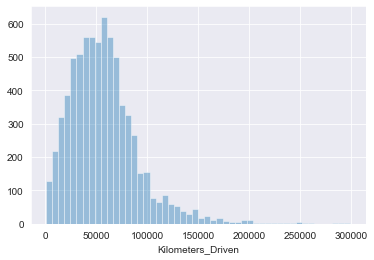

In [447]:
sns.distplot(df[df['Kilometers_Driven']<300000]['Kilometers_Driven'], kde=False)

### 4. Fuel Type

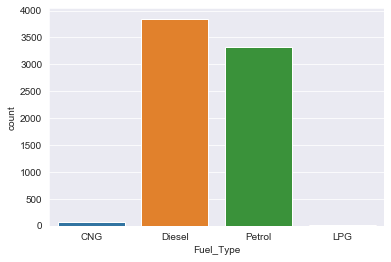

In [448]:
sns.countplot(df['Fuel_Type'])

### 5. Transmission

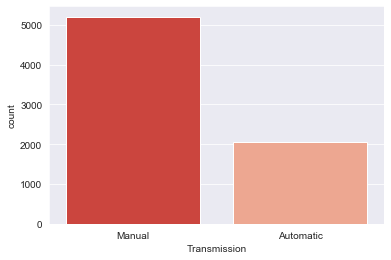

In [449]:
sns.countplot(df['Transmission'], palette="Reds_r")

### 6. Owner Type

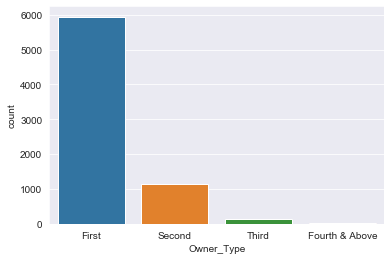

In [450]:
sns.countplot(df['Owner_Type'], order=['First','Second','Third','Fourth & Above'])

### 7. No: of Seats

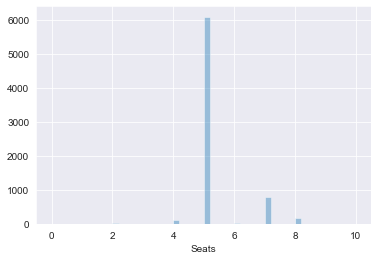

In [451]:
df['Seats'] = df['Seats'].fillna(5)
sns.distplot(df['Seats'], kde=False)

### 8. Engine Capacity (CC)

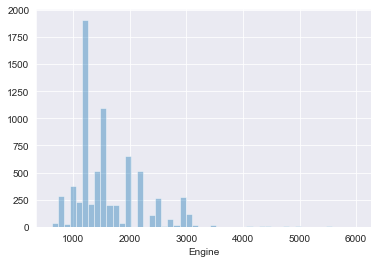

In [452]:
sns.distplot(df['Engine'], kde=False)

### 9. Power in bhp

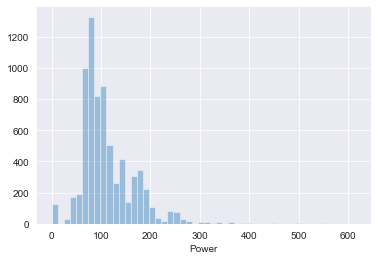

In [453]:
sns.distplot(df['Power'], kde=False)

## Data Preprocessing
### Setting categorical data

In [454]:
def cat(string):
    df[string] = df[string].astype('category')
    df1[string] = df1[string].astype('category')
cat('Location')
cat('Year')
cat('Fuel_Type')
cat('Transmission')
cat('Owner_Type')

In [455]:
cars = df.copy()
cars1 = df1.copy()
carnames = df['Name'].str.split(expand=True)[[0,1,2]]
carnames1 = df1['Name'].str.split(expand=True)[[0,1,2]]

### Naming new columns

In [456]:
carnames.rename(columns={0:'Brand',1:'Model',2:'Type'}, inplace=True)
carnames1.rename(columns={0:'Brand',1:'Model',2:'Type'}, inplace=True)
carnames.head()

,Brand,Model,Type
0,Maruti,Wagon,R
1,Hyundai,Creta,1.6
2,Honda,Jazz,V
3,Maruti,Ertiga,VDI
4,Audi,A4,New


In [457]:
carnames1.head()

,Brand,Model,Type
0,Maruti,Alto,K10
1,Maruti,Alto,800
2,Toyota,Innova,Crysta
3,Toyota,Etios,Liva
4,Hyundai,i20,Magna


### Append to the dataframe

In [458]:
cars = cars.join(carnames)
cars1 = cars1.join(carnames1)
cars = cars.drop("Name", axis=1)
cars1 = cars1.drop("Name", axis=1)

In [459]:
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Car_Age,Brand,Model,Type
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,NaN,10,Maruti,Wagon,R
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,NaN,5,Hyundai,Creta,1.6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,NaN,9,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,8,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,NaN,7,Audi,A4,New


In [460]:
cars1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Age,Brand,Model,Type
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,6,Maruti,Alto,K10
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN,7,Maruti,Alto,800
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh,3,Toyota,Innova,Crysta
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,0.00,5.0,NaN,8,Toyota,Etios,Liva
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,6,Hyundai,i20,Magna


In [461]:
df = cars
df['Brand'] = df['Brand'].astype('category')
df1 = cars1
df1['Brand'] = df1['Brand'].astype('category')
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Car_Age,Brand,Model,Type
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,NaN,10,Maruti,Wagon,R
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,NaN,5,Hyundai,Creta,1.6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,NaN,9,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,8,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,NaN,7,Audi,A4,New


In [462]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Age,Brand,Model,Type
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,6,Maruti,Alto,K10
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN,7,Maruti,Alto,800
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh,3,Toyota,Innova,Crysta
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,0.00,5.0,NaN,8,Toyota,Etios,Liva
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,6,Hyundai,i20,Magna


### Visualisation of Brand Type

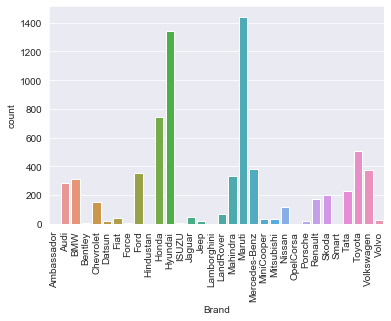

In [463]:
plt.xticks(rotation = 90)
sns.countplot(df['Brand'])

In [464]:
df['Brand'].nunique()

32

## Label Encoding
### Label Encoding preprocessor

In [465]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def label_encode(string):
    le.fit(df[string])
    df[string] = le.transform(df[string])
    le.fit(df1[string])
    df1[string] = le.transform(df1[string])

In [466]:
label_encode('Fuel_Type')
label_encode('Location')
label_encode('Owner_Type')
label_encode('Transmission')
label_encode('Brand')

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price,Car_Age,Brand,Model,Type
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,NaN,10,18,Wagon,R
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,NaN,5,11,Creta,1.6
2,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50,NaN,9,10,Jazz,V
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,NaN,8,18,Ertiga,VDI
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,NaN,7,1,A4,New


In [467]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Car_Age,Brand,Model,Type
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,NaN,6,15,Alto,K10
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,NaN,7,15,Alto,800
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,25.27 Lakh,3,25,Innova,Crysta
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,NaN,8,25,Etios,Liva
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,NaN,6,9,i20,Magna


### Removing columns where encoding is not feasible

In [468]:
df.drop(['Model','Type','New_Price'], inplace=True, axis=1)
df1.drop(['Model','Type','New_Price'], inplace=True, axis=1)

In [469]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,10,18
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,5,11
2,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50,9,10
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,8,18
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,7,1


In [470]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,6,15
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,7,15
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,3,25
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,8,25
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,6,9


In [475]:
train_df = df[df['Price'].isnull()!=True]
test_df = df1
test_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,6,15
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,7,15
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,3,25
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,8,25
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,6,9


In [476]:
train_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,10,18
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,5,11
2,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50,9,10
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,8,18
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,7,1


In [477]:
train_df.shape, test_df.shape

((6012, 13), (1234, 12))

In [478]:
train_df['Price'] = np.log1p(train_df['Price'])

### Train-Test Split

In [479]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [480]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4509, 12), (4509,), (1503, 12), (1503,))

### Building model with LightGBM

In [481]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [482]:
import lightgbm as lgb 
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 2000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 4509, number of used features: 12
[LightGBM] [Info] Start training from score 2.009723
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.165026
[200]	valid_0's rmse: 0.15935
Early stopping, best iteration is:
[177]	valid_0's rmse: 0.158894
RMSLE: 0.15889399218501327


### Feature Priority Graph

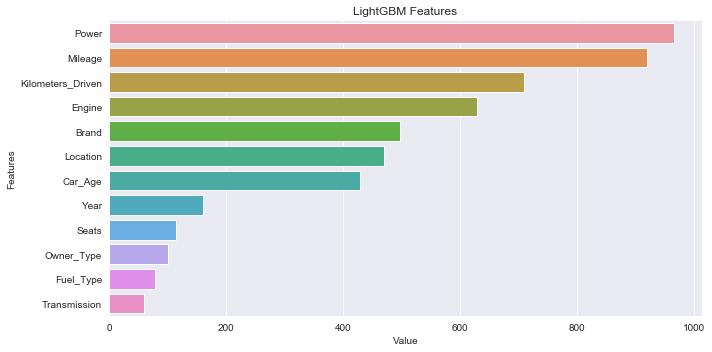

In [483]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Features'])
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [484]:
Xtest = test_df
Xtest.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,6,15
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,7,15
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,3,25
3,5,2012,139000,1,1,0,23.59,1364.0,0.00,5.0,8,25
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,6,9


In [485]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           1234 non-null   int32   
 1   Year               1234 non-null   category
 2   Kilometers_Driven  1234 non-null   int64   
 3   Fuel_Type          1234 non-null   int32   
 4   Transmission       1234 non-null   int32   
 5   Owner_Type         1234 non-null   int32   
 6   Mileage            1234 non-null   float64 
 7   Engine             1224 non-null   float64 
 8   Power              1224 non-null   float64 
 9   Seats              1223 non-null   float64 
 10  Car_Age            1234 non-null   int64   
 11  Brand              1234 non-null   int32   
dtypes: category(1), float64(4), int32(5), int64(2)
memory usage: 84.1 KB


### Testing phase of model

In [486]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    
    y_pred_totlgb.append(p)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.13262903052593855
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fra

RMSLE LGBM:  0.13183727077136115
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.65, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.65
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.1370570448130573


### Mean Error

In [487]:
np.mean(errlgb)

0.15050956876243182

In [488]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

### Save Output in excel format (for reference)

In [489]:
df_sub = pd.DataFrame(data=lgbm_final, columns=['Price'])
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [490]:
df_sub.shape

(1234, 1)

In [491]:
df_sub.head()

,Price
0,3.226480
1,3.191246
2,15.129196
3,3.763042
4,4.176923


## Pickling the model

In [492]:
import pickle
# open a file, where you want to store the data
file = open('lightGBM_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(lgbm, file)